<a href="https://colab.research.google.com/github/sanusahana678-star/HomeLoan/blob/main/Home_Loan_Def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
app = pd.read_csv('application_train.csv')
bur = pd.read_csv('bureau.csv')
#bure_bal = pd.read_csv('bureau_balance.csv')
crd_card_bal = pd.read_csv('credit_card_balance.csv')
pos= pd.read_csv('POS_CASH_balance.csv')
ins = pd.read_csv('installments_payments.csv')
prev= pd.read_csv('previous_application.csv')

In [ ]:
bur_bal=pd.read_csv('/content/bureau _balance.csv')

In [ ]:
#if 'bur_bal' in locals() or 'bur_bal' in globals():
    #del bur_bal
    #print("Variable 'bur_bal' removed from the environment.")

Now, please execute cell `iADMXVnrl5eA` to load the other specified datasets (`app`, `bur`, `crd_card_bal`, `POS_CASH_bal`, `ins`, `prev`).

In [ ]:
app.shape
app['TARGET'].value_counts(normalize=True)


,proportion
TARGET,
0,0.919271
1,0.080729


In [ ]:
bur.shape

(829761, 17)

In [ ]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [ ]:
bur_bal.shape

(1048575, 3)

In [ ]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bur_bal.tail()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
1048570,6549398,-5,1
1048571,6549398,-6,0
1048572,6549398,-7,0
1048573,6549398,-8,0
1048574,6549398,-9,0


In [ ]:
crd_card_bal.shape

(1048575, 23)

In [ ]:
crd_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
pos.shape

(1048575, 8)

In [ ]:

pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
ins.shape

(1048575, 8)

In [ ]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1,6,-1180,-1187,6948.360,6948.360
1,1330831,151639,0,34,-2156,-2156,1716.525,1716.525
2,2085231,193053,2,1,-63,-63,25425.000,25425.000
3,2452527,199697,1,3,-2418,-2426,24350.130,24350.130
4,2714724,167756,1,2,-1383,-1366,2165.040,2160.585


In [ ]:
prev.shape

(1048575, 37)

In [ ]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


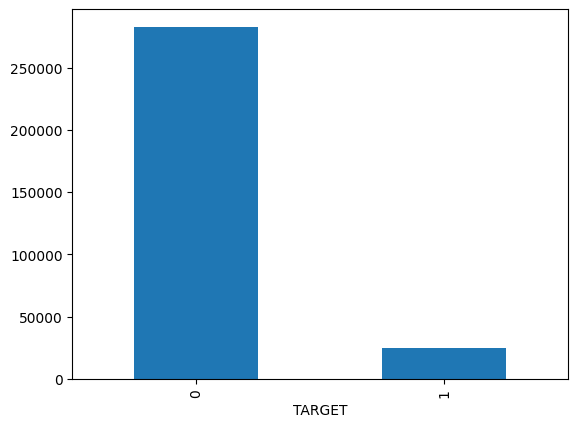

In [ ]:
plt.figure()
app['TARGET'].value_counts().plot(kind='bar')
plt.show()

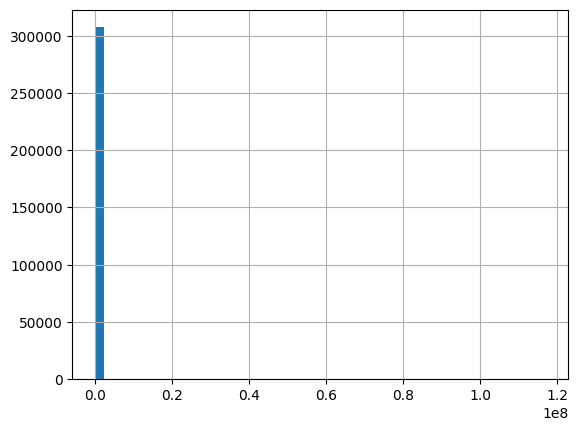

In [ ]:
plt.figure()
app['AMT_INCOME_TOTAL'].hist(bins=50)
plt.show()

<Figure size 640x480 with 0 Axes>

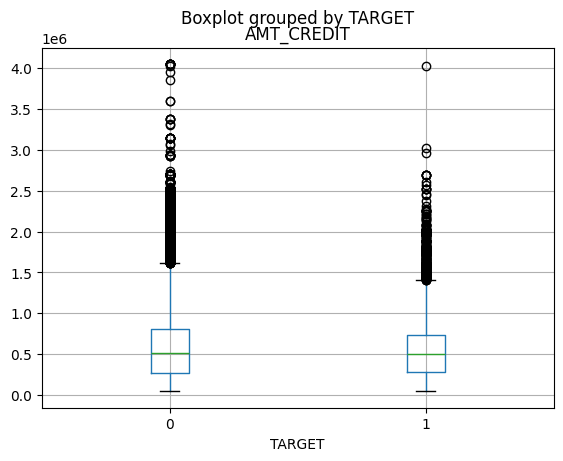

In [ ]:
plt.figure()
app.boxplot(column='AMT_CREDIT', by='TARGET')
plt.show()

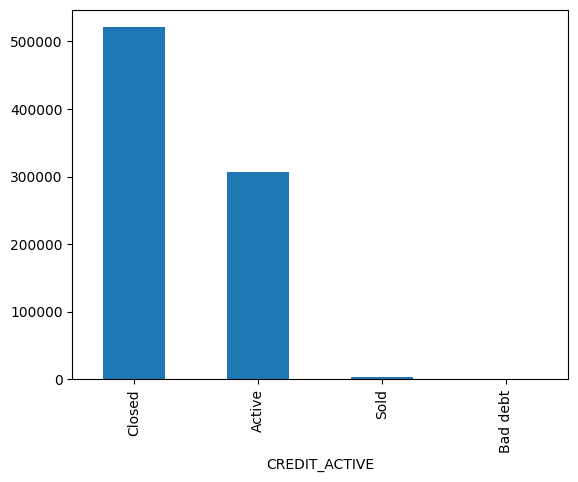

In [ ]:
plt.figure()
bur['CREDIT_ACTIVE'].value_counts().plot(kind='bar')
plt.show()

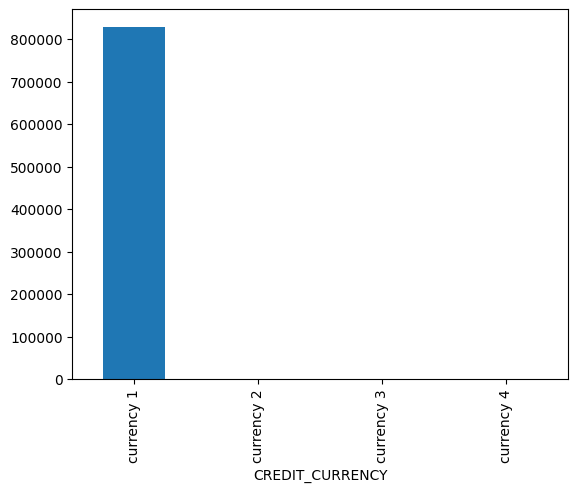

In [ ]:
plt.figure()
bur['CREDIT_CURRENCY'].value_counts().head(10).plot(kind='bar')
plt.show()

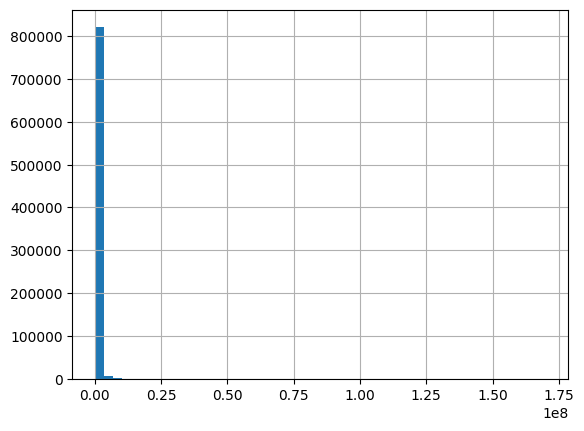

In [ ]:
plt.figure()
bur['AMT_CREDIT_SUM'].hist(bins=50)
plt.show()


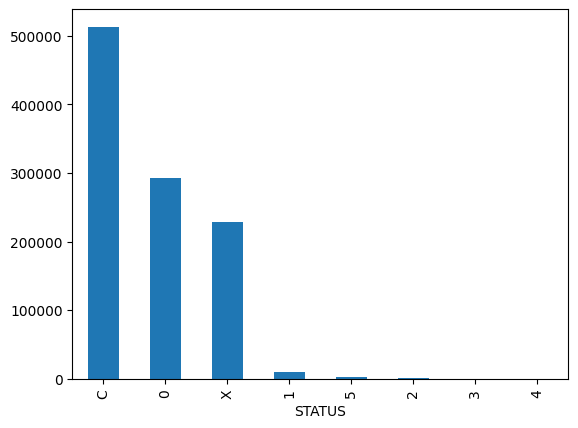

In [ ]:
plt.figure()
bur_bal['STATUS'].value_counts().plot(kind='bar')
plt.show()


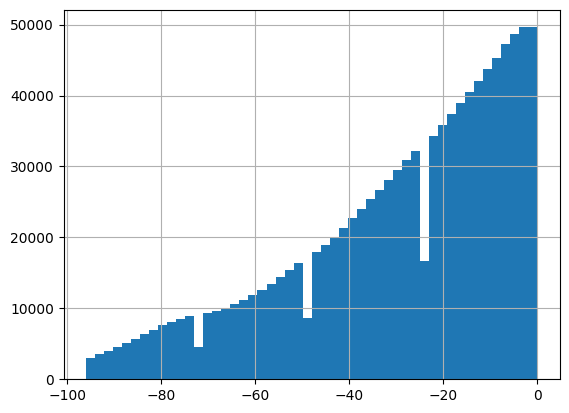

In [ ]:
plt.figure()
bur_bal['MONTHS_BALANCE'].hist(bins=50)
plt.show()

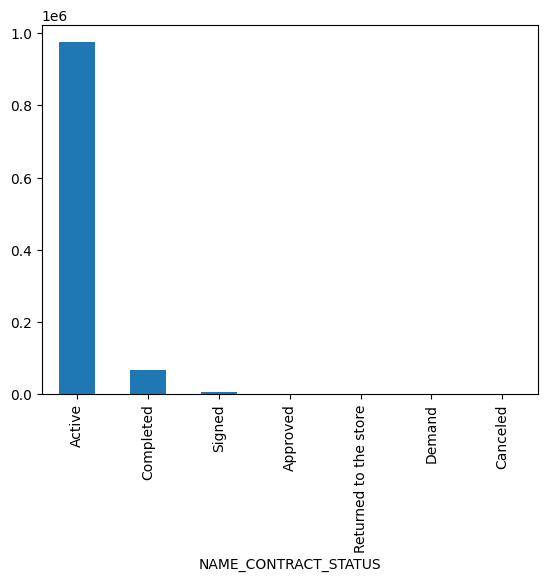

In [ ]:
plt.figure()
pos['NAME_CONTRACT_STATUS'].value_counts().plot(kind='bar')
plt.show()

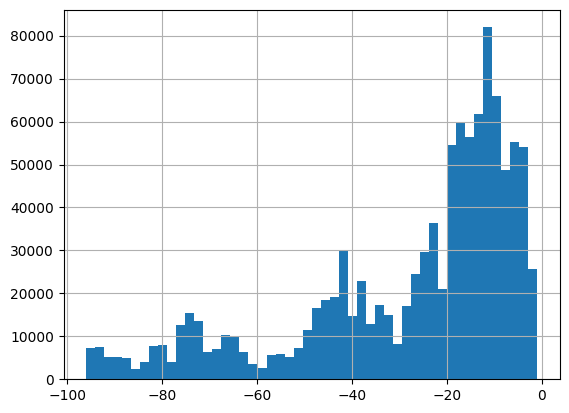

In [ ]:
plt.figure()
pos['MONTHS_BALANCE'].hist(bins=50)
plt.show()


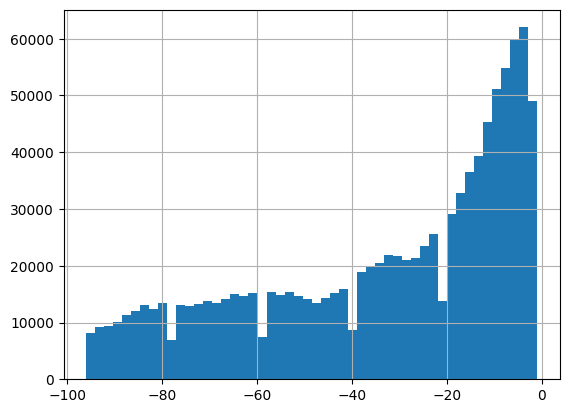

In [ ]:
plt.figure()
crd_card_bal['MONTHS_BALANCE'].hist(bins=50)
plt.show()


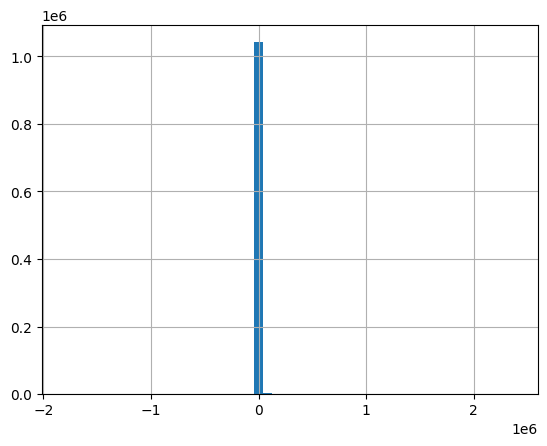

In [ ]:
plt.figure()
(ins['AMT_PAYMENT'] - ins['AMT_INSTALMENT']).hist(bins=50)
plt.show()


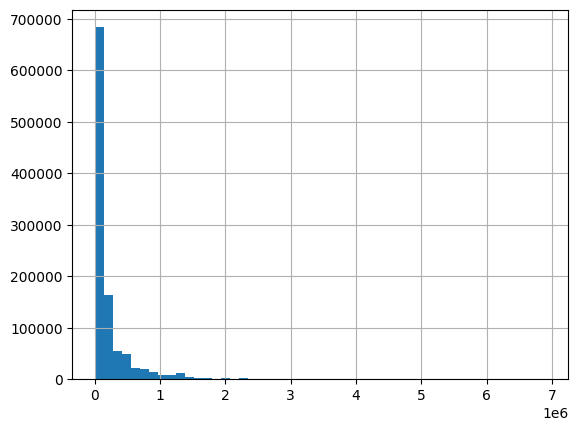

In [ ]:
plt.figure()
prev['AMT_CREDIT'].hist(bins=50)
plt.show()


In [ ]:
num_cols = app.select_dtypes(include=np.number).columns
app[num_cols] = app[num_cols].fillna(app[num_cols].median())

bur_agg = bur.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'CREDIT_DAY_OVERDUE': 'max'
}).reset_index()

data = app.merge(bur_agg, on='SK_ID_CURR', how='left')
data.fillna(0, inplace=True)



In [ ]:
X = data.drop(['TARGET','SK_ID_CURR'], axis=1)
X = X.select_dtypes(include=np.number)
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])
lr_auc

np.float64(0.7360860278870385)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
rf_auc


np.float64(0.7112003442088701)

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])
xgb_auc


np.float64(0.7540690994671277)

In [ ]:
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC_AUC": [lr_auc, rf_auc, xgb_auc]
})

model_results

,Model,ROC_AUC
0,Logistic Regression,0.736086
1,Random Forest,0.711200
2,XGBoost,0.754069


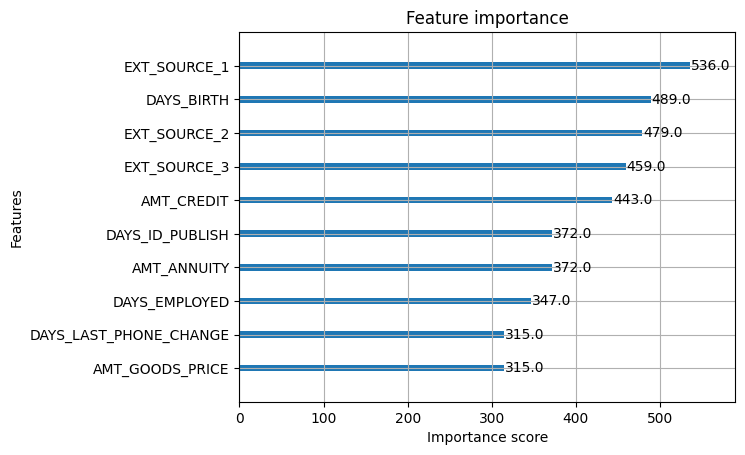

In [ ]:
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()